In [2]:
import numpy as np
from bs4 import BeautifulSoup
import urllib2
import io
import os

import time
import re
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
%matplotlib inline

SONGS_TOTAL = 0



In [1]:
def checkifexisits(path):
    """ Utility to check the lyric file exists"""
    return os.path.exists(path.replace("\\","/"))


In [4]:
def scrapLyrics(datasrc):
    """Get the list of complete lists of songs and pass it to scrapAlbums for song by song scrap """
    r = urllib2.urlopen(datasrc).read()
    print "Requesting .. ",datasrc
    soup = BeautifulSoup(r,"lxml")
    data = soup.find("div", {"id" : "listAlbum"} )
    links = [l['href'] for l in data.findAll("a",{"target":"_blank"})]
    global SONGS_TOTAL
    SONGS_TOTAL = len(links)
    print SONGS_TOTAL
    scrapAlbums(links)

In [5]:
def scrapAlbums(links):

    for link in links:
        
        local_link =  link.replace("../","").replace(".html",".txt") 
       
       
        if  not checkifexisits(local_link):           
            
            page =  urllib2.urlopen("http://www.azlyrics.com"+link.replace("..",""))
            contentsoup = BeautifulSoup(page)
            data = contentsoup.find_all('div')[22].get_text() #hard coded div , can be made generic 
            
            print "Scraping Album : ", link.split("/")[-1].replace("html","")
            
            saveData(data,local_link)
            time.sleep(40*2)  # not flooding with requests , " I am being good :)"
        else:
            print link, "  already present"


In [6]:
def saveData(data,link):
    """Local file dump"""
    filename= link.replace(".html",".txt")
   
    print os.path.dirname(filename)
    
    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))    
    
    file = io.open(filename,"w",encoding='utf8') 
    
    file.write(data.strip())
    file.close()



In [ ]:
#BEWARE : Be careful before running... Scaps the lyrics for the artists given in the list. 

artists = ["rush",'michaeljackson','pinkfloyd',"metallica","beatles","nirvana","queen","rush"]
for artist in artists:
    datasrc = "http://www.azlyrics.com/"+artist[0]+"/"+artist +".html"
    
    scrapLyrics(datasrc)

Requesting ..  http://www.azlyrics.com/r/rush.html
167
lyrics/rush/findingmyway.txt
Scraping Album : 

# Vectorizing the lyrics using sklearn
Take a look at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html 

In [4]:
def get_files(path):
    """Utility function for CountVectorizer """
    text_files = [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.txt')]
    return text_files

In [5]:
def tokenize(text):
    """Using regex to strip all special characters and return list of words """
    return re.sub('\W+', ' ', text.lower()).split()

In [6]:
def do_vectorize(filenames, tokenizer_fn=tokenize, min_df=1,
                 max_df=1., binary=True, ngram_range=(1,1)):
    
    
    if (isinstance(filenames,list)==False):
        filenames = filenames.tolist()
    
    vectorizer = CountVectorizer(input="filename",tokenizer=tokenizer_fn,decode_error='ignore',min_df=min_df,max_df=max_df,binary=binary,ngram_range=ngram_range,dtype=int)
    X = vectorizer.fit_transform(eachfile for eachfile in filenames)
    return (X,vectorizer)
    



## Results and Graphs

In [7]:
def plotgraph(avg,unique,artists,title=None):
    
    fig, ax = plt.subplots()
    ax.scatter(avg,unique)
    ax.set_ylabel("Avg words per song")
    ax.set_xlabel("Unique words")
    if title is not None:
        ax.set_title(title)

    for i, txt in enumerate(artists):
        ax.annotate(txt, (avg[i]+15,unique[i]+1))

In [23]:
def printResults(avg,unique,totalwords,artists):
    for i,artist in enumerate(artists):
        print "***************"
        print  artist+"'s Vocabulary ..:",unique[i]
        
        
        print  "Avg words per song", np.mean((matrix.getnnz(axis=1)))
        print "*******"
        

In [24]:
def getResults(artists):
    
    avg=[]
    unique=[]
    totalwords=[]
    for artist in artists:
        all_lyric_files =  get_files("lyrics"+os.sep+artist)
        matrix, vec = do_vectorize(all_lyric_files)
        unique.append(len(vec.get_feature_names()))
        totalwords.append(vec.get_feature_names())
        avg.append(np.mean((matrix.getnnz(axis=1))))
    return avg,unique,totalwords,matrix,vec

avg,unique,totalwords,matrix,vec = getResults(artists)
printResults(avg,unique,totalwords,artists)


***************
michaeljackson's Vocabulary ..: 3651
Avg words per song 89.5524861878
*******
***************
pinkfloyd's Vocabulary ..: 2869
Avg words per song 89.5524861878
*******
***************
metallica's Vocabulary ..: 3344
Avg words per song 89.5524861878
*******
***************
beatles's Vocabulary ..: 3067
Avg words per song 89.5524861878
*******
***************
nirvana's Vocabulary ..: 2053
Avg words per song 89.5524861878
*******
***************
queen's Vocabulary ..: 3229
Avg words per song 89.5524861878
*******


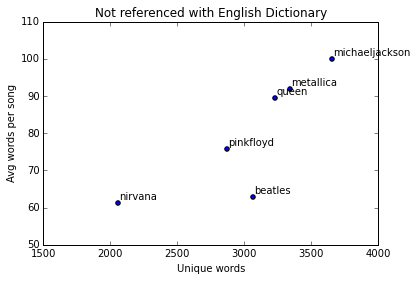

In [17]:
plotgraph(unique,avg,artists,title="Not referenced with English Dictionary")

In [14]:
# CAUTION--- pre-req nltk package, it would take atleast an hour to install. 
from nltk.corpus import words

In [15]:
def getmatch(totalwords):
    inenglish=[]
    for un in totalwords:
        inenglish.append(len(set(un) & set(words.words())))
    return inenglish

words_in_english_dict =  getmatch(totalwords)


C:\Users\Goutham\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


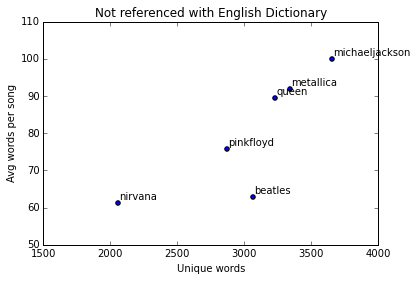

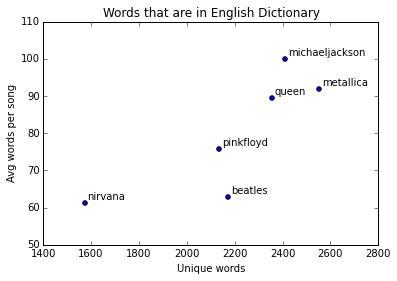

In [16]:
plotgraph(words_in_english_dict,avg,artists,title="Words that are in English Dictionary")